<h1>Smoker Prediction Using Bayesian Network</h1>

<h3>Kelas AI/ML B</h3>
<ul>
    <li>Wahyu Andhika Rizaldi - 5027211003</li>
    <li>Athallah Narda Wiyoga - 5027211041</li>
</ul>

<h3>Dataset Source: </h3>
<a>https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction</a>

<h3>Requirements:</h3>
<ul>
    <li>bnlearn</li>
    <li>Seaborn</li>
    <li>Sklearn</li>
    <li>Matplotlib</li>
    <li>Download Smoker Dataset</li>
</ul>


<h4>Install dependencies</h5>

In [14]:
%pip install bnlearn

Note: you may need to restart the kernel to use updated packages.


<h4>Importing libraries</h4>

In [15]:
import numpy as np
import pandas as pd
import bnlearn as bn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<h4>Reading the data</h4>

In [16]:
train = pd.read_csv('C:/Users/wahyu/Documents/Sem5/AI/Smoker-Prediction/dataset/train_smoker.csv')
test = pd.read_csv('C:/Users/wahyu/Documents/Sem5/AI/Smoker-Prediction/dataset/test_smoker.csv')

<h4>Analysing the data</h4>

In [17]:
train.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [18]:
test.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,...,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000
mean,44.312006,164.555602,65.692782,82.009792,1.007182,1.004351,1.026095,1.026035,121.537587,76.029148,...,126.470254,57.283816,114.691525,14.618692,1.088820,0.885055,26.147235,26.781362,40.062246,0.210797
std,12.089099,9.210712,12.639255,9.150549,0.458500,0.467140,0.159423,0.159245,13.751759,9.727289,...,71.259041,15.018255,35.948974,1.559794,0.411293,0.223621,19.769301,30.085442,51.657330,0.407887
min,20.000000,135.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,79.000000,40.000000,...,16.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,107.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,30.000000,43.000000,0.000000
max,85.000000,190.000000,125.000000,125.800000,9.900000,9.900000,2.000000,2.000000,240.000000,140.000000,...,405.000000,618.000000,1660.000000,20.900000,6.000000,10.300000,1311.000000,2062.000000,999.000000,1.000000


<h4>Preparing the data</h4>

In [19]:
# Dropping irrelevant columns
drop_list = ['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
train = train.drop(columns=drop_list)
test = test.drop(columns=drop_list)

In [20]:
# Converting categorical data
dfhot_train, dfnum_train = bn.df2onehot(train)
dfhot_test, dfnum_test = bn.df2onehot(test)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 16/16 [00:01<00:00, 11.88it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 16/16 [00:02<00:00,  7.56it/s]


[df2onehot] >Total onehot features: 1474

[df2onehot] >Auto detecting dtypes.


100%|██████████| 15/15 [00:00<00:00, 28.68it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 15/15 [00:00<00:00, 17.01it/s]


[df2onehot] >Total onehot features: 1198


In [21]:
dfnum_target = dfnum_train.pop('smoking')

<h4>Making the Bayesian Network</h4>

In [22]:
Xtrain, Xval, Ztrain, Zval = train_test_split(dfnum_train, dfnum_target, test_size=0.4, random_state=0)
valid = pd.concat([Xval, Zval], axis='columns')
dfnum = pd.concat([Xtrain, Ztrain], axis='columns')

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [nb]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


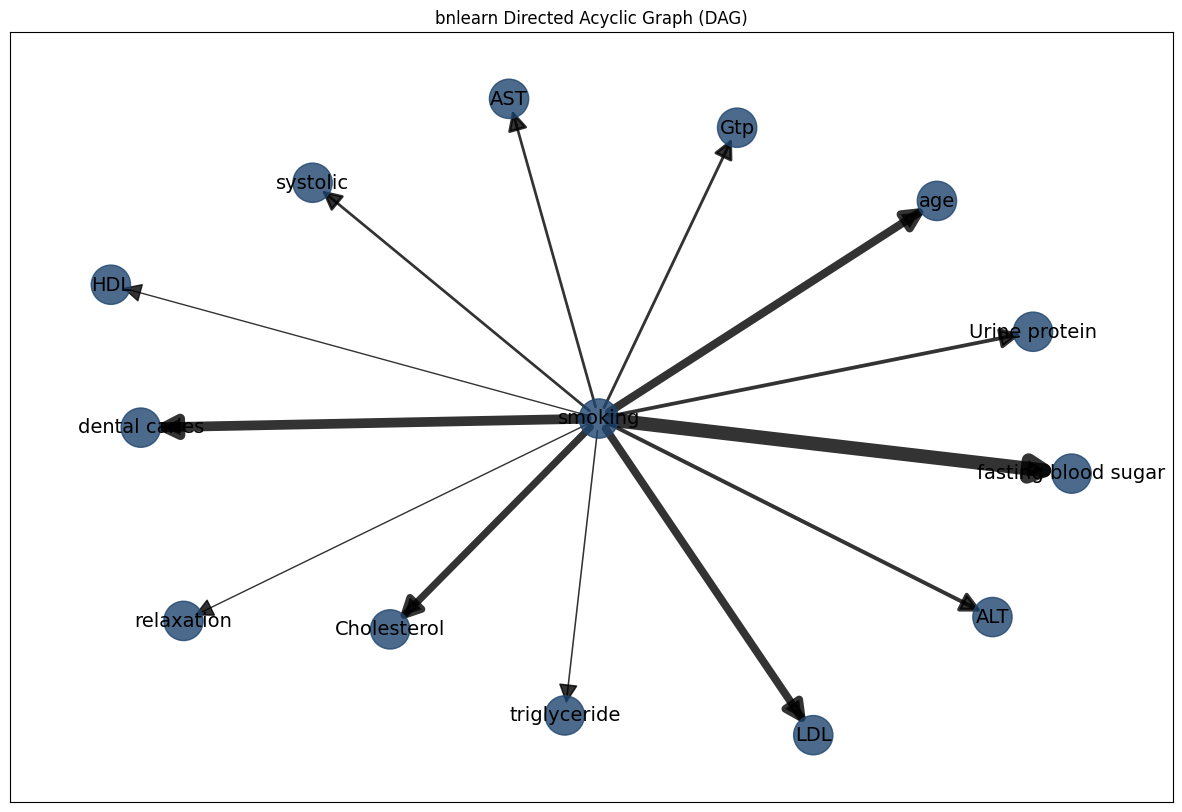

In [23]:
# Structure learning
DAG = bn.structure_learning.fit(dfnum, methodtype='nb', root_node='smoking', verbose=3)

# Compute edge strength using chi-square independence test
model = bn.independence_test(DAG, dfnum, prune=False)

# Plot
G = bn.plot(model)

In [24]:
# Parameter learning
model = bn.parameter_learning.fit(model, dfnum, verbose=3);

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.models.NaiveBayes.NaiveBayes'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of smoking:
+------------+----------+
| smoking(0) | 0.623698 |
+------------+----------+
| smoking(1) | 0.376302 |
+------------+----------+
[bnlearn] >CPD of age:
+---------+-----------------------+-----------------------+
| smoking | smoking(0)            | smoking(1)            |
+---------+-----------------------+-----------------------+
| age(1)  | 0.025027234138462112  | 0.041154313108987324  |
+---------+-----------------------+-----------------------+
| age(2)  | 0.054346192855264625  | 0.07918002677209474   |
+---------+-----------------------+-----------------------+
| age(3)  | 0.06078847526388939   | 0.09541450051365064   |
+---------+-----------------------+-----------------------+
| age(4)  | 0.05894782314713946   | 0.1168788718363789    |
+---------

<h4>Get prediction and accuracy</h4>

In [25]:
# function Accuracy
def get_acc(model, df, col):
    # Get accuracy score by the model for the validation dataset df with target col
    pred = bn.predict(model, df, variables=[col])
    print(pred)
    acc = accuracy_score(df[col], pred[col])
    print('Accuracy -', acc)
    return acc

In [26]:
# Get score of the model1
acc1 = get_acc(model, valid, 'smoking')

[bnlearn]> Remaining columns for inference: 13


100%|██████████| 14733/14733 [00:59<00:00, 246.72it/s]


       smoking         p
0            1  0.980451
1            0  0.989076
2            0  0.881734
3            0  0.934481
4            1  0.833155
...        ...       ...
15589        1  0.628049
15590        0  0.964648
15591        1  0.849722
15592        0  0.854235
15593        0  0.857662

[15594 rows x 2 columns]
Accuracy - 0.6837245094267026
